# 🧪 SP4 Data Wrangling  PII

**Objetivo del webinar:**  
Desarrollar habilidades prácticas para la exploración, transformación y visualización de datos usando Pandas, dentro del proceso de análisis de datos en Python.

## 🎯 Objetivos principales de la sesión

1. **Identificar y manipular tipos de datos** en un DataFrame para asegurar una base sólida en el preprocesamiento.
2. **Aplicar transformaciones y crear nuevas variables** para enriquecer la información disponible y facilitar el análisis.
3. **Construir visualizaciones básicas** para explorar relaciones y comunicar hallazgos de forma efectiva.


## 🩺  Datos de salud pública

Imagina que formas parte del equipo de análisis de una institución de salud pública. Se te ha asignado la tarea de explorar y analizar un conjunto de datos con información de pacientes atendidos por una enfermedad respiratoria durante el **2023**. El objetivo es identificar patrones relevantes, agrupar información clave y generar visualizaciones que apoyen la toma de decisiones clínicas y epidemiológicas.

El conjunto de datos incluye variables como: edad, sexo, fechas de ingreso y egreso hospitalario, región geográfica, síntomas reportados, diagnóstico confirmado, resultado de laboratorio, días de hospitalización y estado final del paciente.

### 🎯 Objetivos del caso práctico

1. **Limpiar y preparar los datos** para asegurar su calidad y consistencia antes del análisis.
2. **Generar nuevas variables derivadas**, como duración de hospitalización y grupos de edad, para facilitar la segmentación y el análisis.
3. **Explorar visualmente los datos** mediante histogramas, gráficos de barras y líneas, para comprender mejor la distribución de los casos y su evolución en el tiempo.


### Diccionario de datos

| Columna             | Descripción                                                                 |
|---------------------|------------------------------------------------------------------------------|
| id_paciente         | Identificador único asignado a cada paciente.                               |
| edad                | Edad del paciente en años.                                                  |
| sexo                | Sexo del paciente, puede ser "masculino" (M) o "femenino" (F).              |
| fecha_ingreso       | Fecha en la que el paciente ingresó al hospital.                            |
| fecha_egreso        | Fecha en la que el paciente egresó del hospital.                            |
| region              | Región geográfica donde reside el paciente.                                 |
| sintoma_principal   | Síntomas que presentó el paciente.                                          |
| diagnostico         | Diagnóstico médico confirmado para el paciente.                             |
| resultado_laboratorio | Resultados de las pruebas de laboratorio realizadas al paciente.         |
| estado_paciente     | Estado final/actual del paciente.                                           |
| spo2                | Nivel de saturación de oxígeno en la sangre, expresado como porcentaje.     |
| presion_sanguinea   | Medida de la presión arterial del paciente, expresada como "sistólica/diastólica". |


### Cargado de datos y herramientas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Datos en google sheets por si desean replicar en casa
# https://docs.google.com/spreadsheets/d/1KXcXTFe02SqSKsmd6S36bbbwVkVwZNUFZq-aYsDX-i4/edit?usp=sharing
PATH="/content/base_de_datos_de_salud_publica - base_de_datos_de_salud_publica.csv" ## Agrega aquí la ruta de tu archivo

In [3]:
datos = pd.read_csv(PATH)
datos

,id_paciente,fecha_ingreso,fecha_egreso,edad,sexo,SpO2,presion_arterial,region,sintoma_principal,diagnostico_confirmado,resultado_laboratorio,estado_paciente
0,1,2023-11-24,2023-12-03,51,M,99.8518,129/86 mmHg,Sur,Fiebre,Sí,Positivo,Recuperado
1,2,2023-02-27,2023-03-02,92,F,96.5460,106/75 mmHg,Centro,Dolor muscular,Sí,Positivo,Recuperado
2,3,2023-01-13,2023-01-18,14,M,96.6984,123/66 mmHg,Norte,Tos,No,Negativo,Recuperado
3,4,2023-05-21,2023-05-30,71,M,95.7144,116/81 mmHg,Oeste,Fiebre,No,Positivo,Recuperado
4,5,2023-05-06,2023-05-20,60,M,95.9740,123/89 mmHg,Norte,Fiebre,Sí,Positivo,Fallecido
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,2023-09-30,2023-10-04,76,M,95.8794,140/84 mmHg,Centro,Tos,Sí,Negativo,Recuperado
196,197,2023-03-06,2023-03-17,2,F,94.7053,122/78 mmHg,Oeste,Tos,Sí,Positivo,Recuperado
197,198,2023-03-07,2023-03-19,69,F,97.2632,116/83 mmHg,Norte,Dificultad respiratoria,Sí,Positivo,Activo
198,199,2023-12-04,2023-12-10,71,M,97.0086,132/89 mmHg,Centro,Dolor muscular,No,Negativo,Activo


### Familizarización con los datos

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_paciente             200 non-null    int64  
 1   fecha_ingreso           199 non-null    object 
 2   fecha_egreso            199 non-null    object 
 3   edad                    199 non-null    object 
 4   sexo                    200 non-null    object 
 5   SpO2                    199 non-null    float64
 6   presion_arterial        200 non-null    object 
 7   region                  200 non-null    object 
 8   sintoma_principal       200 non-null    object 
 9   diagnostico_confirmado  200 non-null    object 
 10  resultado_laboratorio   199 non-null    object 
 11  estado_paciente         200 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 18.9+ KB


> ¿Los datos tiene el formato adecuado? 🤔


### Conversión de datos

#### Numéricos

In [7]:
# Casteo de string a int
datos['edad'].astype(int) # Conversion no segura

ValueError: invalid literal for int() with base 10: '15a'

In [8]:
datos['edad'] = pd.to_numeric(datos['edad'], errors='coerce') # Conversión segura

> `pd.to_numeric()` es más seguro que `.astype(int)` porque convierte errores en `NaN` en lugar de fallar.  
> Útil cuando no estás seguro de que todo sea número.

In [10]:
datos['presion_arterial']

,presion_arterial
0,129/86 mmHg
1,106/75 mmHg
2,123/66 mmHg
3,116/81 mmHg
4,123/89 mmHg
...,...
195,140/84 mmHg
196,122/78 mmHg
197,116/83 mmHg
198,132/89 mmHg


In [11]:
# Divide en dos columnas con el método str.split(expand=True)
presion_split = datos['presion_arterial'].str.replace('mmHg', '').str.strip().str.split("/", expand=True)

# Asigna los valores a nuevas columnas
datos['presion_arterial_sistolica'] = pd.to_numeric(presion_split[0], errors='coerce')
datos['presion_arterial_distolica'] = pd.to_numeric(presion_split[1], errors='coerce')

datos

,id_paciente,fecha_ingreso,fecha_egreso,edad,sexo,SpO2,presion_arterial,region,sintoma_principal,diagnostico_confirmado,resultado_laboratorio,estado_paciente,presion_arterial_sistolica,presion_arterial_distolica
0,1,2023-11-24,2023-12-03,51.0,M,99.8518,129/86 mmHg,Sur,Fiebre,Sí,Positivo,Recuperado,129,86
1,2,2023-02-27,2023-03-02,92.0,F,96.5460,106/75 mmHg,Centro,Dolor muscular,Sí,Positivo,Recuperado,106,75
2,3,2023-01-13,2023-01-18,14.0,M,96.6984,123/66 mmHg,Norte,Tos,No,Negativo,Recuperado,123,66
3,4,2023-05-21,2023-05-30,71.0,M,95.7144,116/81 mmHg,Oeste,Fiebre,No,Positivo,Recuperado,116,81
4,5,2023-05-06,2023-05-20,60.0,M,95.9740,123/89 mmHg,Norte,Fiebre,Sí,Positivo,Fallecido,123,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,2023-09-30,2023-10-04,76.0,M,95.8794,140/84 mmHg,Centro,Tos,Sí,Negativo,Recuperado,140,84
196,197,2023-03-06,2023-03-17,2.0,F,94.7053,122/78 mmHg,Oeste,Tos,Sí,Positivo,Recuperado,122,78
197,198,2023-03-07,2023-03-19,69.0,F,97.2632,116/83 mmHg,Norte,Dificultad respiratoria,Sí,Positivo,Activo,116,83
198,199,2023-12-04,2023-12-10,71.0,M,97.0086,132/89 mmHg,Centro,Dolor muscular,No,Negativo,Activo,132,89


#### Fechas

---

> **DATETIME**: Objeto que representa fechas y horas en pandas, permitiendo operaciones como filtrado, extracción y conversión de componentes temporales.


---

In [13]:
pd.to_datetime(datos['fecha_ingreso']).info()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: fecha_ingreso
Non-Null Count  Dtype         
--------------  -----         
199 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.7 KB


In [14]:
datos['fecha_ingreso'] = pd.to_datetime(datos['fecha_ingreso'],format='%Y-%m-%d', errors='coerce')
datos['fecha_egreso'] = pd.to_datetime(datos['fecha_egreso'],format='%Y-%m-%d', errors='coerce')

---


##### Parámetros `format` y `errors` en `pd.to_datetime`

- **`format`**: Define el formato exacto de la fecha para mejorar rendimiento y evitar ambigüedades.  
  Se usa con códigos de formato tipo `strftime`, por ejemplo:
  - `%Y-%m-%d` → `2023-12-31` (ISO estándar)
  - `%d/%m/%Y` → `31/12/2023`
  - `%m-%d-%Y %H:%M` → `12-31-2023 15:45`
  - `%Y-%m-%dT%H:%M:%SZ` → con zona horaria en UTC (ISO 8601 con Z)

- **`errors`**: Maneja errores durante la conversión.
  - `"raise"` (default): lanza error si hay un valor inválido.
  - `"coerce"`: convierte errores en `NaT` (Not a Time).
  - `"ignore"`: devuelve el original sin convertir.

##### Formatos que pandas detecta automáticamente
Pandas reconoce muchas estructuras comunes sin necesidad de especificar `format`, como:
- `2023-12-31`
- `31/12/2023`
- `Dec 31, 2023`
- `2023-12-31T23:59:59Z` (formato ISO con zona horaria)
- `2023-12-31 23:59:59+00:00` (con offset de zona horaria)

##### Referencia para profundizar en `format` de fechas

Puedes revisar la documentación oficial de Python sobre `strftime` y `strptime` aquí:  
[https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)

Ahí encontrarás todos los códigos disponibles como `%Y` (año), `%m` (mes), `%d` (día), `%H` (hora), entre otros.



---

In [15]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_paciente                 200 non-null    int64         
 1   fecha_ingreso               199 non-null    datetime64[ns]
 2   fecha_egreso                199 non-null    datetime64[ns]
 3   edad                        198 non-null    float64       
 4   sexo                        200 non-null    object        
 5   SpO2                        199 non-null    float64       
 6   presion_arterial            200 non-null    object        
 7   region                      200 non-null    object        
 8   sintoma_principal           200 non-null    object        
 9   diagnostico_confirmado      200 non-null    object        
 10  resultado_laboratorio       199 non-null    object        
 11  estado_paciente             200 non-null    object        

In [16]:
datos.head()

,id_paciente,fecha_ingreso,fecha_egreso,edad,sexo,SpO2,presion_arterial,region,sintoma_principal,diagnostico_confirmado,resultado_laboratorio,estado_paciente,presion_arterial_sistolica,presion_arterial_distolica
0,1,2023-11-24,2023-12-03,51.0,M,99.8518,129/86 mmHg,Sur,Fiebre,Sí,Positivo,Recuperado,129,86
1,2,2023-02-27,2023-03-02,92.0,F,96.5460,106/75 mmHg,Centro,Dolor muscular,Sí,Positivo,Recuperado,106,75
2,3,2023-01-13,2023-01-18,14.0,M,96.6984,123/66 mmHg,Norte,Tos,No,Negativo,Recuperado,123,66
3,4,2023-05-21,2023-05-30,71.0,M,95.7144,116/81 mmHg,Oeste,Fiebre,No,Positivo,Recuperado,116,81
4,5,2023-05-06,2023-05-20,60.0,M,95.9740,123/89 mmHg,Norte,Fiebre,Sí,Positivo,Fallecido,123,89


### Ingeniería de características

In [17]:
#Crea una estimación del año de nacimiento del paciente
datos['año_nacimiento']= 2023 - datos['edad']

In [18]:
datos.head()

,id_paciente,fecha_ingreso,fecha_egreso,edad,sexo,SpO2,presion_arterial,region,sintoma_principal,diagnostico_confirmado,resultado_laboratorio,estado_paciente,presion_arterial_sistolica,presion_arterial_distolica,año_nacimiento
0,1,2023-11-24,2023-12-03,51.0,M,99.8518,129/86 mmHg,Sur,Fiebre,Sí,Positivo,Recuperado,129,86,1972.0
1,2,2023-02-27,2023-03-02,92.0,F,96.5460,106/75 mmHg,Centro,Dolor muscular,Sí,Positivo,Recuperado,106,75,1931.0
2,3,2023-01-13,2023-01-18,14.0,M,96.6984,123/66 mmHg,Norte,Tos,No,Negativo,Recuperado,123,66,2009.0
3,4,2023-05-21,2023-05-30,71.0,M,95.7144,116/81 mmHg,Oeste,Fiebre,No,Positivo,Recuperado,116,81,1952.0
4,5,2023-05-06,2023-05-20,60.0,M,95.9740,123/89 mmHg,Norte,Fiebre,Sí,Positivo,Fallecido,123,89,1963.0


In [19]:
#Determina los dias que el paciente estuvo hospitalizado
datos['dias_hospitalizacion']= datos['fecha_egreso']-datos['fecha_ingreso']

In [21]:
datos.head()

,id_paciente,fecha_ingreso,fecha_egreso,edad,sexo,SpO2,presion_arterial,region,sintoma_principal,diagnostico_confirmado,resultado_laboratorio,estado_paciente,presion_arterial_sistolica,presion_arterial_distolica,año_nacimiento,dias_hospitalizacion
0,1,2023-11-24,2023-12-03,51.0,M,99.8518,129/86 mmHg,Sur,Fiebre,Sí,Positivo,Recuperado,129,86,1972.0,9 days
1,2,2023-02-27,2023-03-02,92.0,F,96.5460,106/75 mmHg,Centro,Dolor muscular,Sí,Positivo,Recuperado,106,75,1931.0,3 days
2,3,2023-01-13,2023-01-18,14.0,M,96.6984,123/66 mmHg,Norte,Tos,No,Negativo,Recuperado,123,66,2009.0,5 days
3,4,2023-05-21,2023-05-30,71.0,M,95.7144,116/81 mmHg,Oeste,Fiebre,No,Positivo,Recuperado,116,81,1952.0,9 days
4,5,2023-05-06,2023-05-20,60.0,M,95.9740,123/89 mmHg,Norte,Fiebre,Sí,Positivo,Fallecido,123,89,1963.0,14 days


In [ ]:
datos['fecha_ingreso'].dt.year.unique()

In [22]:
# Convierte los dias a numeros en vez de ventana de tiempo
datos['dias_hospitalizacion'] = datos['dias_hospitalizacion'].dt.days

In [23]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_paciente                 200 non-null    int64         
 1   fecha_ingreso               199 non-null    datetime64[ns]
 2   fecha_egreso                199 non-null    datetime64[ns]
 3   edad                        198 non-null    float64       
 4   sexo                        200 non-null    object        
 5   SpO2                        199 non-null    float64       
 6   presion_arterial            200 non-null    object        
 7   region                      200 non-null    object        
 8   sintoma_principal           200 non-null    object        
 9   diagnostico_confirmado      200 non-null    object        
 10  resultado_laboratorio       199 non-null    object        
 11  estado_paciente             200 non-null    object        

Si tenemos una columna de dia, otra de mes y otra se año, cómo podríamos construir una sola columna de fecha?

In [ ]:
data = {'day': [15, 28, 5, 10],
        'month': [1, 2, 3, 4],
        'year': [2023, 2024, 2025, 2023]}
df = pd.DataFrame(data)

#Construir la columna de fecha
df['Fecha'] = pd.to_datetime(df[['year', 'month', 'day']])

---

`apply()` permite aplicar funciones a filas o columnas. Usa `axis=0` para columnas y `axis=1` para filas, permitiendo operaciones personalizadas sobre cada elemento.

---

In [24]:
#Crear columna “grupo de edad” (niño, adulto, adulto mayor)
def edad_a_grupo(edad):
    if edad < 18:
        return 'Niño'
    elif edad < 65:
        return 'Adulto'
    else:
        return 'Adulto mayor'

datos['grupo_edad'] = datos['edad'].apply(edad_a_grupo)
datos


,id_paciente,fecha_ingreso,fecha_egreso,edad,sexo,SpO2,presion_arterial,region,sintoma_principal,diagnostico_confirmado,resultado_laboratorio,estado_paciente,presion_arterial_sistolica,presion_arterial_distolica,año_nacimiento,dias_hospitalizacion,grupo_edad
0,1,2023-11-24,2023-12-03,51.0,M,99.8518,129/86 mmHg,Sur,Fiebre,Sí,Positivo,Recuperado,129,86,1972.0,9.0,Adulto
1,2,2023-02-27,2023-03-02,92.0,F,96.5460,106/75 mmHg,Centro,Dolor muscular,Sí,Positivo,Recuperado,106,75,1931.0,3.0,Adulto mayor
2,3,2023-01-13,2023-01-18,14.0,M,96.6984,123/66 mmHg,Norte,Tos,No,Negativo,Recuperado,123,66,2009.0,5.0,Niño
3,4,2023-05-21,2023-05-30,71.0,M,95.7144,116/81 mmHg,Oeste,Fiebre,No,Positivo,Recuperado,116,81,1952.0,9.0,Adulto mayor
4,5,2023-05-06,2023-05-20,60.0,M,95.9740,123/89 mmHg,Norte,Fiebre,Sí,Positivo,Fallecido,123,89,1963.0,14.0,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,2023-09-30,2023-10-04,76.0,M,95.8794,140/84 mmHg,Centro,Tos,Sí,Negativo,Recuperado,140,84,1947.0,4.0,Adulto mayor
196,197,2023-03-06,2023-03-17,2.0,F,94.7053,122/78 mmHg,Oeste,Tos,Sí,Positivo,Recuperado,122,78,2021.0,11.0,Niño
197,198,2023-03-07,2023-03-19,69.0,F,97.2632,116/83 mmHg,Norte,Dificultad respiratoria,Sí,Positivo,Activo,116,83,1954.0,12.0,Adulto mayor
198,199,2023-12-04,2023-12-10,71.0,M,97.0086,132/89 mmHg,Centro,Dolor muscular,No,Negativo,Activo,132,89,1952.0,6.0,Adulto mayor


In [25]:
#Generar una bandera de “caso grave” si la persona estuvo más de 7 días hospitalizada o falleció

def caso_grave(row):
  dias_hospitalizacion = row['dias_hospitalizacion']
  estado_paciente = row['estado_paciente']
  return dias_hospitalizacion > 7 or estado_paciente.lower() == 'fallecido'


datos['caso_grave'] = datos.apply(caso_grave, axis=1)
datos

,id_paciente,fecha_ingreso,fecha_egreso,edad,sexo,SpO2,presion_arterial,region,sintoma_principal,diagnostico_confirmado,resultado_laboratorio,estado_paciente,presion_arterial_sistolica,presion_arterial_distolica,año_nacimiento,dias_hospitalizacion,grupo_edad,caso_grave
0,1,2023-11-24,2023-12-03,51.0,M,99.8518,129/86 mmHg,Sur,Fiebre,Sí,Positivo,Recuperado,129,86,1972.0,9.0,Adulto,True
1,2,2023-02-27,2023-03-02,92.0,F,96.5460,106/75 mmHg,Centro,Dolor muscular,Sí,Positivo,Recuperado,106,75,1931.0,3.0,Adulto mayor,False
2,3,2023-01-13,2023-01-18,14.0,M,96.6984,123/66 mmHg,Norte,Tos,No,Negativo,Recuperado,123,66,2009.0,5.0,Niño,False
3,4,2023-05-21,2023-05-30,71.0,M,95.7144,116/81 mmHg,Oeste,Fiebre,No,Positivo,Recuperado,116,81,1952.0,9.0,Adulto mayor,True
4,5,2023-05-06,2023-05-20,60.0,M,95.9740,123/89 mmHg,Norte,Fiebre,Sí,Positivo,Fallecido,123,89,1963.0,14.0,Adulto,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,2023-09-30,2023-10-04,76.0,M,95.8794,140/84 mmHg,Centro,Tos,Sí,Negativo,Recuperado,140,84,1947.0,4.0,Adulto mayor,False
196,197,2023-03-06,2023-03-17,2.0,F,94.7053,122/78 mmHg,Oeste,Tos,Sí,Positivo,Recuperado,122,78,2021.0,11.0,Niño,True
197,198,2023-03-07,2023-03-19,69.0,F,97.2632,116/83 mmHg,Norte,Dificultad respiratoria,Sí,Positivo,Activo,116,83,1954.0,12.0,Adulto mayor,True
198,199,2023-12-04,2023-12-10,71.0,M,97.0086,132/89 mmHg,Centro,Dolor muscular,No,Negativo,Activo,132,89,1952.0,6.0,Adulto mayor,False


### Transformación de datos

#### Agregación de variables`Agg`

El equipo de salud pública necesita comprender cómo varían la edad, la duración de la hospitalización y la gravedad de la enfermedad entre los diferentes grupos de edad. Esto les permitirá identificar grupos de mayor riesgo y adaptar las estrategias de prevención y tratamiento. Por ejemplo, si se observa que los adultos mayores tienen una mayor duración de hospitalización y una mayor cantidad de casos graves, se podrían implementar medidas específicas para proteger a este grupo vulnerable.

---

`.agg()` es una función de Pandas que permite aplicar una o varias funciones de agregación a un DataFrame o Series, usualmente después de agrupar con `groupby()`.

**Parámetros:**

* **`func`:** Puede ser:
    * Una función:  `np.mean`, `sum`, `min`, `max`, etc.
    * Una lista de funciones:  `[np.mean, 'sum']`
    * Un diccionario: `{columna: función, otra_columna: ['min', 'max']}`
    * listado nombres: `nombre_1= (columna_1, función_1), nombre_2= (columna_2, función_2), nombre_3= (columna_3, función_3)`

**Funciones Default:**

Algunas funciones comunes accesibles directamente son:
* `'mean'`
* `'sum'`
* `'size'` (cuenta elementos)
* `'count'` (cuenta valores no nulos)
* `'std'` (desviación estándar)
* `'var'` (varianza)
* `'min'`
* `'max'`
* `'first'` (primer valor)
* `'last'` (último valor)
* `'nunique'` (cuenta valores únicos)


---

In [26]:
# Muestra una tabla que indique la duración promedio de la hospitalización  y la cantidad de casos graves por grupo de edad

(datos
 .groupby('grupo_edad',as_index=False)
 .agg(
     dias_hospitalizacion_avg=('dias_hospitalizacion', 'mean'),
     total_de_casos = ('id_paciente','count'),
     casos_graves_count=('caso_grave', 'sum'),
     casos_graves_rate = ('caso_grave', 'mean')
    )
  .sort_values('casos_graves_rate', ascending=False)
)

,grupo_edad,dias_hospitalizacion_avg,total_de_casos,casos_graves_count,casos_graves_rate
2,Niño,8.179487,39,22,0.564103
0,Adulto,7.505376,94,53,0.563830
1,Adulto mayor,7.696970,67,34,0.507463


>¿Qué sugieren los datos?

#### Tablas dinámicas `pivot_tables`

Se requiere un análisis de la distribución geográfica de los casos y su relación con el estado del paciente. Se busca identificar si existen regiones con mayor incidencia de casos o con mayor mortalidad. Esto podría ayudar a comprender factores geográficos que influyen en la propagación de la enfermedad y a asignar recursos de manera eficiente a las zonas más afectadas.

---

`pivot_table` es una función de Pandas que crea una tabla dinámica a partir de un DataFrame. Permite resumir y agregar datos de forma flexible, similar a las tablas dinámicas en hojas de cálculo.

**Parámetros:**

* **`data`:** El DataFrame a utilizar.
* **`values`:** La columna o columnas a agregar (opcional, si se omite se usa `aggfunc='size'` para contar).
* **`index`:** La columna o columnas a usar como índice (filas de la tabla).
* **`columns`:** La columna o columnas a usar como columnas de la tabla.
* **`aggfunc`:** La función o funciones de agregación a aplicar (por defecto `'mean'`).
    * Puede ser una función, una lista de funciones, o un diccionario que mapea columnas a funciones.
    * `'size'` cuenta la cantidad de elementos en cada grupo.





---

In [30]:
(
datos
  .groupby(['region','estado_paciente'],as_index=False)
  .agg(casos=('id_paciente','count'))
)

,region,estado_paciente,casos
0,Centro,Activo,11
1,Centro,Fallecido,2
2,Centro,Recuperado,34
3,Este,Activo,5
4,Este,Fallecido,4
5,Este,Recuperado,19
6,Norte,Activo,7
7,Norte,Fallecido,2
8,Norte,Recuperado,27
9,Oeste,Activo,7


In [31]:
#Crea una pivot_table que muestre la cantidad de pacientes por región geográfica
# y estado del paciente (recuperado, fallecido).
datos.pivot_table(
    index='region',
    columns='estado_paciente',
    values='id_paciente',
    aggfunc='count'
)

estado_paciente,Activo,Fallecido,Recuperado
region,,,
Centro,11,2,34
Este,5,4,19
Norte,7,2,27
Oeste,7,1,33
Sur,6,2,40


#### Unir dataframes

Para comprender mejor la situación, necesitan comparar la tasa de casos graves de cada región con la tasa nacional. Esto les permitirá identificar las regiones con tasas significativamente más altas o más bajas que el promedio nacional, lo que podría indicar la necesidad de intervenciones específicas o la asignación de recursos adicionales.

---


`merge()` es una función de Pandas que permite combinar dos DataFrames en función de una o más columnas clave. Es similar a las operaciones JOIN en bases de datos relacionales.

**Funcionamiento:**

`merge()` busca coincidencias entre las columnas clave especificadas en ambos DataFrames y crea un nuevo DataFrame que contiene las columnas de ambos DataFrames, combinadas en función de las coincidencias.

**Parámetros clave:**

* **`left`:** El primer DataFrame.
* **`right`:** El segundo DataFrame.
* **`on`:** Nombre de la columna o columnas clave comunes en ambos DataFrames.
* **`how`:** Tipo de unión a realizar:
    * `'left'` (por defecto): Unión izquierda.
    * `'right'` : Unión derecha.
    * `'inner'` : Unión interna.
    * `'outer'` : Unión externa.



---

In [32]:
casos_graves_rates=(datos
                    .groupby('region',as_index=False)
                    .agg(casos_graves_rate = ('caso_grave', 'mean'))
                    )

casos_graves_rates['casos_graves_rate'] = casos_graves_rates['casos_graves_rate'].round(2)
casos_graves_rates

,region,casos_graves_rate
0,Centro,0.51
1,Este,0.64
2,Norte,0.61
3,Oeste,0.51
4,Sur,0.50


In [33]:
referencia_nacional=[
    {'region': 'Centro', 'Tasa Nacional': 0.35},
    {'region': 'Este', 'Tasa Nacional': 0.54},
    {'region': 'Norte', 'Tasa Nacional': 0.45},
    {'region': 'Oeste', 'Tasa Nacional': 0.49},
    {'region': 'Sur', 'Tasa Nacional': 0.47}
]

referencia_nacional = pd.DataFrame(referencia_nacional)
referencia_nacional

,region,Tasa Nacional
0,Centro,0.35
1,Este,0.54
2,Norte,0.45
3,Oeste,0.49
4,Sur,0.47


In [34]:
(
    casos_graves_rates
    .merge(referencia_nacional, on='region', how='left')
)

,region,casos_graves_rate,Tasa Nacional
0,Centro,0.51,0.35
1,Este,0.64,0.54
2,Norte,0.61,0.45
3,Oeste,0.51,0.49
4,Sur,0.50,0.47


> ¿Qué sugieren los datos?

### Visualización de datos

El equipo de salud pública necesita comprender la distribución de la edad de los pacientes que han sido atendidos por una enfermedad respiratoria. Esto les permitirá identificar los grupos de edad más afectados y adaptar las estrategias de prevención y tratamiento de manera específica. Por ejemplo, si se observa una alta concentración de pacientes en un rango de edad particular, se podrían enfocar las campañas de vacunación o las medidas de prevención en ese grupo.

---



`.plot()` es una función para crear gráficos como líneas, dispersión, histogramas y barras.

**Uso:**
* **`kind`:** Tipo de gráfico (`'line'`, `'scatter'`, `'hist'`, `'bar'`, etc.). Por defecto: `'line'`.
* **`kwargs`:** Opciones adicionales (título, etiquetas, color, tamaño, etc.).

**Tipos de gráficos:**

* `'line'` (por defecto): Gráfico de líneas.
* `'scatter'`: Gráfico de dispersión.
* `'hist'`: Histograma.
* `'bar'`: Gráfico de barras.
* `'box'`: Diagrama de caja.
* `'pie'`: Gráfico circular.
* `'kde'`: Gráfico de densidad.



**Referencias**

* [Dataframe plot](https://pandas.pydata.org/pandas-docs/version/2.1.3/reference/api/pandas.DataFrame.plot.html)


---

## ¿Cómo varia la presion arterial de los pacientes?

Text(0, 0.5, 'Frecuencia')

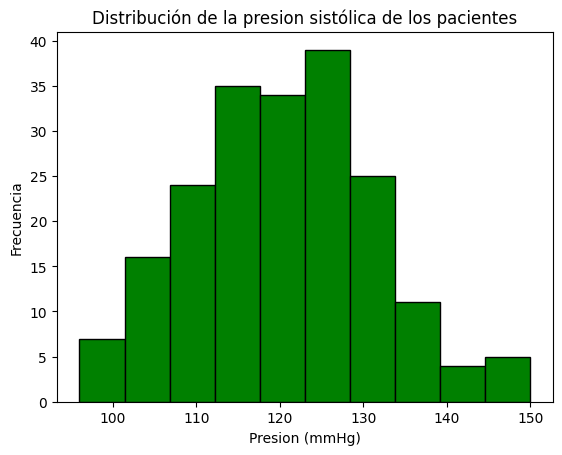

In [39]:
datos['presion_arterial_sistolica'].plot(kind='hist', bins=10, edgecolor='black',color='green')
plt.title('Distribución de la presion sistólica de los pacientes')
plt.xlabel('Presion (mmHg)')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

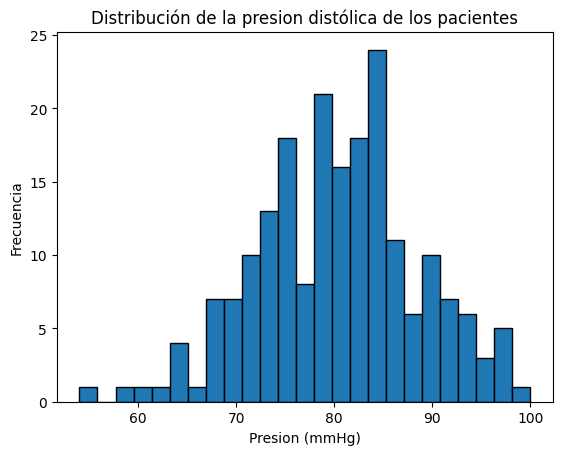

In [36]:
datos['presion_arterial_distolica'].plot(kind='hist', bins=25, edgecolor='black')
plt.title('Distribución de la presion distólica de los pacientes')
plt.xlabel('Presion (mmHg)')
plt.ylabel('Frecuencia')

In [37]:
datos['presion_arterial_distolica'].min()

54

## ¿Cómo se distribuyen por grupo de edad?

Text(0, 0.5, 'Casos')

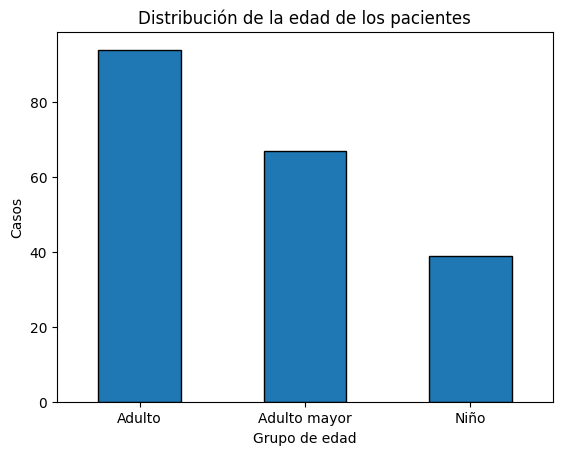

In [40]:
valores_por_grupo_de_edad=datos['grupo_edad'].value_counts()
valores_por_grupo_de_edad.plot(kind='bar', edgecolor='black', rot=0)
plt.title('Distribución de la edad de los pacientes')
plt.xlabel('Grupo de edad')
plt.ylabel('Casos')

Text(0, 0.5, 'Casos')

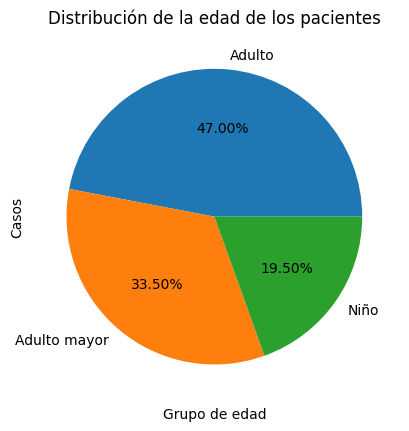

In [41]:
valores_por_grupo_de_edad.plot(kind='pie', autopct='%1.2f%%')
plt.title('Distribución de la edad de los pacientes')
plt.xlabel('Grupo de edad')
plt.ylabel('Casos')